In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent/'src'))
from data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from fastai.data.all import *
from fastai.vision.all import *

/home/aberzl/mambaforge/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BASE = get_data_path(env='cdrive', folder='base')
TRN_ANN = get_data_path(env='cdrive', folder='train_annotations')
TRN_IMG = get_data_path(env='cdrive', folder='train_images')

In [12]:
TRN_IMG

'/mnt/c/dev/datasets/hubmap-organ-segmentation/train_images'

In [5]:
MASK = Path('/mnt/c/dev/datasets/hubmap-organ-segmentation/mask')

In [14]:
dblock = DataBlock(blocks=(ImageBlock, MaskBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=lambda o: MASK/f'{o.stem}.png',
                   )

In [15]:
dls = dblock.dataloaders(TRN_IMG, bs=8)

/home/aberzl/mambaforge/lib/python3.9/site-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


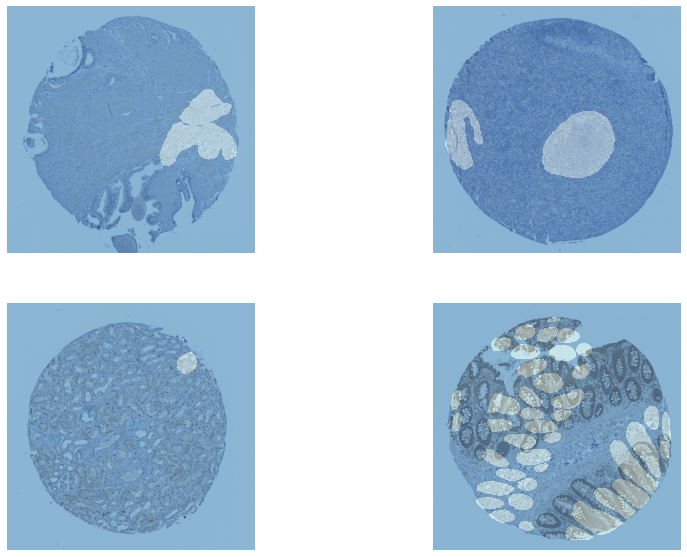

In [16]:
dls.show_batch(max_n=4, vmin=1, vmax=30, figsize=(14,10))